In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 가상 데이터 생성
np.random.seed(0)
X = pd.DataFrame(np.random.rand(100, 8), columns=['A1', 'A2', 'A3', 'A4', 'A5', 'P', 'R', 'L'])
y = pd.DataFrame(np.random.rand(100, 2).astype(np.float32), columns=['y1', 'y2'])

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 성능 평가 (여기서는 평균 제곱 오차 사용)
mse = mean_squared_error(y_test, y_pred)
mse


0.11084477274621704

In [2]:
from sklearn.decomposition import PCA

# 주성분 분석(PCA)를 이용한 차원 축소
# 여기서는 예시로 주요한 성분 5개만 유지합니다.
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# PCA 결과를 적용한 데이터셋을 다시 훈련 세트와 테스트 세트로 분할
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# 선형 회귀 모델 생성 및 훈련
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# 테스트 데이터에 대한 예측
y_pred_pca = model_pca.predict(X_test_pca)

# 모델 성능 평가
mse_pca = mean_squared_error(y_test, y_pred_pca)
mse_pca


0.10930621365515958

# Keras를 이용한 MLP

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MLP 모델 정의
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1])
])

# 모델 컴파일
model_mlp.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 모델 훈련
history = model_mlp.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_split=0.2)

# 모델 평가
mse_mlp = model_mlp.evaluate(X_test, y_test, verbose=0)
mse_mlp


KeyboardInterrupt: 

# Pytorch를 이용한 MLP

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# PyTorch를 사용한 MLP 모델 정의
class MLPRegressor(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLPRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 데이터를 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# 데이터 로더 설정
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# 모델 초기화
model = MLPRegressor(X_train.shape[1], y_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 훈련
epochs = 100
train_losses = []
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        train_losses.append(loss.item())
        optimizer.step()

# 모델 평가
model.eval()
test_losses = []
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    test_loss = criterion(y_pred_test, y_test_tensor).item()
    test_losses.append(test_loss)



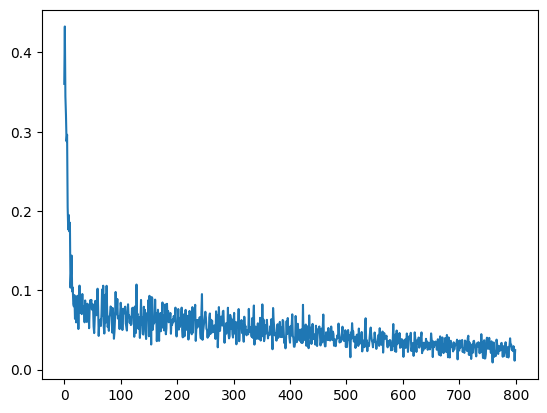

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.plot(test_losses, color='orange')
plt.show()

# GridSearch로 새로운 y에 대한 X의 값 찾기

In [9]:
import itertools
import numpy as np

# 예측하고자 하는 y1, y2, P, R, L 값 (가정된 값)
target_y = np.array([0.5, 0.5])  # 예측하고자 하는 y1, y2 값
known_values = np.array([0.3, 0.4, 0.5])  # P, R, L 값

# A1, A2, A3, A4, A5의 가능한 값 범위 설정 (예시)
a1_range = np.linspace(0, 1, 10)  # 예시 범위, 실제로는 적절한 범위 설정 필요
a2_range = np.linspace(0, 1, 10)
a3_range = np.linspace(0, 1, 10)
a4_range = np.linspace(0, 1, 10)
a5_range = np.linspace(0, 1, 10)

# 가장 좋은 조합을 찾기 위한 변수 초기화
best_combination = None
best_error = float('inf')

# Grid Search
for a1, a2, a3, a4, a5 in itertools.product(a1_range, a2_range, a3_range, a4_range, a5_range):
    # 현재 조합의 입력값 생성
    current_x = np.array([a1, a2, a3, a4, a5, *known_values])
    
    # 현재 조합에 대한 y1, y2 예측 (여기서는 실제 모델을 사용해야 함)
    # 예시로는 임의의 예측값을 사용
    # predicted_y = model.predict([current_x])  # 실제로는 모델의 예측 결과 사용
    predicted_y = np.random.rand(2)  # 임의의 예측값

    # 예측 오류 계산
    error = np.sum((predicted_y - target_y) ** 2)

    # 최소 오류를 갖는 조합 업데이트
    if error < best_error:
        best_error = error
        best_combination = current_x

best_combination, best_error
print(f'A1: {best_combination[0]}, A2: {best_combination[1]}, A3: {best_combination[2]}, A4: {best_combination[3]}, A5: {best_combination[4]}')
print(f'P: {best_combination[5]}, R: {best_combination[6]}, L: {best_combination[7]}')


A1: 5.7368421052631575, A2: 1.9473684210526314, A3: 3.8421052631578947, A4: 6.684210526315789, A5: 1.0
P: 0.3, R: 0.4, L: 0.5


In [10]:
a1_range

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [15]:
import torch
import numpy as np
import itertools

# 예측하고자 하는 y1, y2, P, R, L 값 (가정된 값)
target_y = np.array([0.5, 0.5])  # 예측하고자 하는 y1, y2 값
known_values = np.array([0.3, 0.4, 0.5])  # P, R, L 값

# A1, A2, A3, A4, A5의 가능한 값 범위 설정 (예시)
a1_range = np.linspace(0, 1, 10)  # 예시 범위, 실제로는 적절한 범위 설정 필요
a2_range = np.linspace(0, 1, 10)
a3_range = np.linspace(0, 1, 10)
a4_range = np.linspace(0, 1, 10)
a5_range = np.linspace(0, 1, 10)

# 가장 좋은 조합을 찾기 위한 변수 초기화
best_combination = None
best_error = float('inf')

# PyTorch 모델 로드 (여기서는 예시로 MLPRegressor 클래스를 사용함)
# model = MLPRegressor(input_size, output_size)
# model.load_state_dict(torch.load('model.pth'))  # 모델 가중치 로드
# model.eval()

# Grid Search
error_list = []
for a1, a2, a3, a4, a5 in itertools.product(a1_range, a2_range, a3_range, a4_range, a5_range):
    # 현재 조합의 입력값 생성
    current_x = torch.tensor([[a1, a2, a3, a4, a5, *known_values]], dtype=torch.float32)
    
    # 현재 조합에 대한 y1, y2 예측
    with torch.no_grad():
        predicted_y = model(current_x).numpy()[0]

    # 예측 오류 계산
    error = np.sum((predicted_y - target_y) ** 2)
    error_list.append(error)

    # 최소 오류를 갖는 조합 업데이트
    if error < best_error:
        best_error = error
        best_combination = current_x.numpy()[0]

# best_combination, best_error
print(f'A1: {best_combination[0]}, A2: {best_combination[1]}, A3: {best_combination[2]}, A4: {best_combination[3]}, A5: {best_combination[4]}')
print(f'P: {best_combination[5]}, R: {best_combination[6]}, L: {best_combination[7]}')

A1: 0.5555555820465088, A2: 0.4444444477558136, A3: 0.5555555820465088, A4: 0.3333333432674408, A5: 0.6666666865348816
P: 0.30000001192092896, R: 0.4000000059604645, L: 0.5


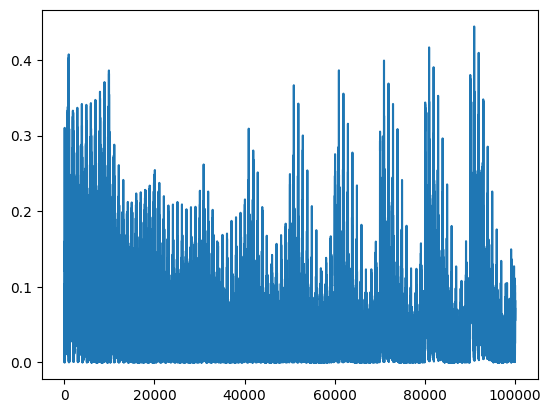

In [16]:
import matplotlib.pyplot as plt

plt.plot(error_list)